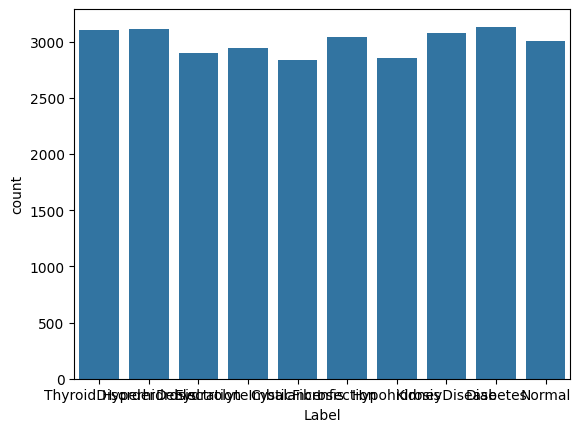

Accuracy is: 0.9416666666666667
Confusion Matrix : 
 [[791  15   6   3   0  18  15  12   0   6]
 [ 12 782   0   0  30   3   0  12   0   0]
 [  0   3 880   9   0   0   0   0   0  12]
 [ 12   9  27 870   0   9   6   9   0   0]
 [  9  24   6   0 862   9   0   0   0  12]
 [  6   9   9   6  12 772   6   6   0   6]
 [  3   9   0   3   6   6 831  30   0   0]
 [  3   0   0   0   9  12  21 856   0   3]
 [  0   3   0   0   0   0   0   0 945   0]
 [  6   6  18   3   9  15   6   6   0 886]]
Classification Report:
                       precision    recall  f1-score   support

      CysticFibrosis       0.94      0.91      0.93       866
         Dehydration       0.91      0.93      0.92       839
            Diabetes       0.93      0.97      0.95       904
ElectrolyteImbalance       0.97      0.92      0.95       942
       Hyperhidrosis       0.93      0.93      0.93       922
        Hypohidrosis       0.91      0.93      0.92       832
           Infection       0.94      0.94      0.94      

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

data = pd.read_csv('dataset.csv')

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

sns.countplot(x='Label', data=data)
plt.show()

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

y_pred = model.predict(X_test)

acc = metrics.accuracy_score(y_pred, y_test)
print("Accuracy is:", acc)

cm = metrics.confusion_matrix(y_pred, y_test)
print('Confusion Matrix : \n', cm)



# Classification report
classification_report = metrics.classification_report(y_pred, y_test)
print('Classification Report:\n', classification_report)



In [ ]:
import pickle
import urllib.request
import json
from time import sleep
while True:
  conn = urllib.request.urlopen("https://api.thingspeak.com/channels/565129/feeds.json?results=1")
  response = conn.read()
  print ("http status code=%s" % (conn.getcode()))
  data=json.loads(response)
  x=int(data['feeds'][0]['entry_id'])
  y=x
  conn.close()
  while x==y:
    conn = urllib.request.urlopen("https://api.thingspeak.com/channels/565129/feeds.json?results=1")
    response = conn.read()
    #print ("http status code=%s" % (conn.getcode()))
    data=json.loads(response)
    y=int(data['feeds'][0]['entry_id'])
    conn.close()

  conn = urllib.request.urlopen("https://api.thingspeak.com/channels/565129/feeds.json?results=1")
  response = conn.read()
  print ("http status code=%s" % (conn.getcode()))
  data=json.loads(response)
  a=float(data['feeds'][0]['field3'])
  b=float(data['feeds'][0]['field4'])
  c=float(data['feeds'][0]['field3'])
  d=float(data['feeds'][0]['field4'])
  e=float(data['feeds'][0]['field5'])
  conn.close()
  filename = 'random_forest.sav'
  loaded_model = pickle.load(open(filename, 'rb'))
  person_reports = [[a,b,c,d,e]]
  predicted = loaded_model.predict(person_reports)
  print("ANALYSING....")
  print(predicted[0])
  ft=predicted[0]
  conn = urllib.request.urlopen("https://api.thingspeak.com/update?api_key=1Z4GBPZ7ZZEV8NCW&field1="+str(a)+"&field2="+str(b)+"&field3="+str(c)+"&field4="+str(d)+"&field5="+str(e)+"&field6="+str(ft))        #response = conn.read()
